# Sales Analysis

#### Import necessary libraries

In [3]:
import os
import pandas as pd

#### Merge data from each month into one CSV

In [4]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe

In [5]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### Clean up the data!


##### Drop rows of NAN

In [6]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in order date column

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [9]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add month column (alternative method)

In [10]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Add city column

In [11]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data["Price Each"] =  (all_data["Price Each"])  * 4.1 #converted into MYR
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,176558,USB-C Charging Cable,2,48.995,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,409.959,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA)
3,176560,Google Phone,1,2460.000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
4,176560,Wired Headphones,1,49.159,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
5,176561,Wired Headphones,1,49.159,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [13]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,10903,7.428250e+06,9709,7.471253e+06
2,13449,8.974427e+06,23950,9.028292e+06
3,17005,1.144395e+07,45459,1.150911e+07
4,20558,1.380745e+07,73116,1.390175e+07
5,18667,1.285401e+07,82830,1.292569e+07
6,15253,1.050431e+07,81324,1.056899e+07
7,16072,1.079341e+07,100051,1.085588e+07
8,13448,9.144416e+06,95688,9.202318e+06
9,13109,8.548468e+06,104589,8.599997e+06


range(1, 13)


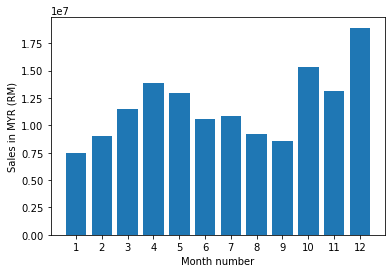

In [14]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in MYR (RM)')
plt.xlabel('Month number')
plt.show()



#### Question 2: What city sold the most product?

In [15]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Atlanta (GA),16602,1.139762e+07,104794,104794,1.146154e+07
Austin (TX),11153,7.420482e+06,69829,69829,7.460285e+06
Boston (MA),22528,1.491338e+07,141112,141112,1.501273e+07
Dallas (TX),16730,1.128577e+07,104620,104620,1.134870e+07
Los Angeles (CA),33289,2.222788e+07,208325,208325,2.235554e+07
New York City (NY),27932,1.900502e+07,175741,175741,1.912370e+07
Portland (ME),2750,1.833476e+06,17144,17144,1.844009e+06
Portland (OR),11303,7.628289e+06,70621,70621,7.670003e+06
San Francisco (CA),50239,3.366699e+07,315520,315520,3.387504e+07


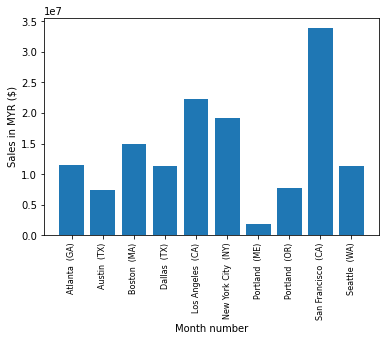

In [16]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in MYR ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [17]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,48.995,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),97.990,8,46,1
2,176559,Bose SoundSport Headphones,1,409.959,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),409.959,22,30,1
3,176560,Google Phone,1,2460.000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),2460.000,14,38,1
4,176560,Wired Headphones,1,49.159,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),49.159,14,38,1
5,176561,Wired Headphones,1,49.159,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),49.159,9,27,1


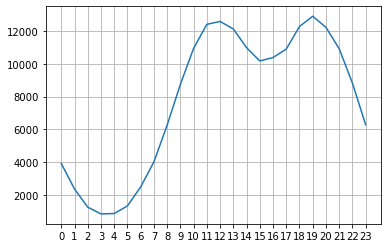

In [18]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

In [19]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\OEM\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

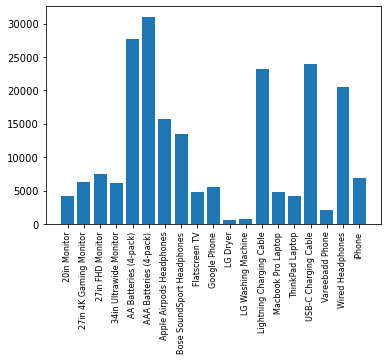

In [21]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\OEM\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


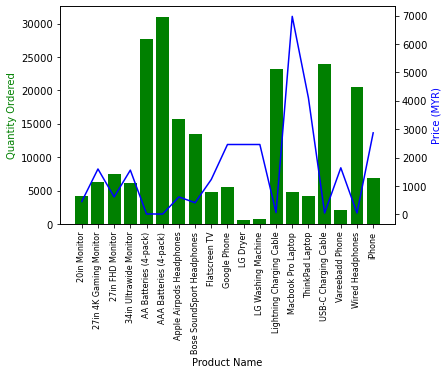

In [22]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price (MYR)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

 ## ML implementation (Supervised Learning) using Linear Regression Algorithm to predict whats the item based on quantity ordered & sales ? Problem not clear !

In [29]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import numpy as np

In [51]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,48.995,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),97.990,8,46,1
2,176559,Bose SoundSport Headphones,1,409.959,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),409.959,22,30,1
3,176560,Google Phone,1,2460.000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),2460.000,14,38,1
4,176560,Wired Headphones,1,49.159,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),49.159,14,38,1
5,176561,Wired Headphones,1,49.159,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),49.159,9,27,1


In [95]:
## Determine what features will affects the label (product)
feature = all_data[["Product","Quantity Ordered", "Sales"]]
feature.reset_index(drop=True, inplace=True)
feature.head()

,Product,Quantity Ordered,Sales
0,USB-C Charging Cable,2,97.990
1,Bose SoundSport Headphones,1,409.959
2,Google Phone,1,2460.000
3,Wired Headphones,1,49.159
4,Wired Headphones,1,49.159


In [96]:
all_data.loc[all_data["Product"] == "Lightning Charging Cable"] ##convert string into float == classify products name = INT (preprosessing)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
12,176568,Lightning Charging Cable,1,61.295,04/15/19 12:18,"438 Elm St, Seattle, WA 98101",4,4,Seattle (WA),61.295,12,18,1
15,176571,Lightning Charging Cable,1,61.295,04/19/19 14:29,"253 Johnson St, Atlanta, GA 30301",4,4,Atlanta (GA),61.295,14,29,1
36,176589,Lightning Charging Cable,1,61.295,04/04/19 12:23,"846 Highland St, Atlanta, GA 30301",4,4,Atlanta (GA),61.295,12,23,1
40,176593,Lightning Charging Cable,2,61.295,04/15/19 13:45,"906 7th St, Portland, OR 97035",4,4,Portland (OR),122.590,13,45,1
46,176599,Lightning Charging Cable,1,61.295,04/11/19 15:25,"279 Maple St, New York City, NY 10001",4,4,New York City (NY),61.295,15,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186805,259315,Lightning Charging Cable,1,61.295,09/29/19 16:20,"112 5th St, Boston, MA 02215",9,9,Boston (MA),61.295,16,20,1
186807,259317,Lightning Charging Cable,1,61.295,09/26/19 21:12,"151 1st St, New York City, NY 10001",9,9,New York City (NY),61.295,21,12,1
186819,259329,Lightning Charging Cable,1,61.295,09/05/19 19:00,"480 Lincoln St, Atlanta, GA 30301",9,9,Atlanta (GA),61.295,19,0,1
186825,259335,Lightning Charging Cable,1,61.295,09/26/19 17:21,"791 Forest St, Seattle, WA 98101",9,9,Seattle (WA),61.295,17,21,1


In [97]:
##convert string into float == classify products name = INT (preprosessing)
from sklearn import preprocessing

le = preprocessing.LabelEncoder()



product = le.fit_transform(all_data["Product"]) ## convert all products into INT without knowing INT points to which product


In [98]:
Y = list(product)

In [99]:
predict = "Product"

X = np.array(feature.drop([predict],1)) ##feature | dropping predict and set it to Y
Y = list(product) ##label

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size= 0.2)

In [100]:
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)
accuracy = linear.score(x_test, y_test)
accuracy

0.031168016829982825

In [101]:
print("Coef:" , linear.coef_)
print("Intercept:" , linear.intercept_)

Coef: [-1.15424555e+00  4.78377836e-04]
Intercept: 10.067778353736186


In [105]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print("predicted value", predictions[x], "feature value", x_test[x], "real product value", y_test[x])

predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.678439347437509 featur

predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 9.207735170767146 feature value [  1. 615.] real prod

predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.919397235801899 feature value [

predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.658825856180774 feature value [1

predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.942854971344952 feature value

predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.109648100992

predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 10.09034227732018 featu

predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.20773517076714

predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.109648100992219 feature value [  1.    409.9

predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 10.874862314098289 

predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.129261592248954 feature value [  1.    450

predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 featur

predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 11
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.936970923967932 feature

predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 6.622634999933323 feature value [ 3.    36.777] real product value 5
predicted value 9.20771555727589 feature va

predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.921064382558

predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 7.817931588953718 feature value [  2.   122.59] real product value 12
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.658825856180774 feature 

predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 6.622634999933323 feature value [ 3.    36.777] real product value 5
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.92106438255872 featur

predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    4

predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 7.817931588953718 feature value [  2.   122.59] real product value 12
predicted value 9.109648100992219 feature 

predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature

predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 10.286477189887522 feature va

predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 6.627636440203791 feature value [ 3.    47.232] real product value 4
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.50193753961815

predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.919397235801899 feature value [ 1.   

predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.936970923967932 feature value

predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.92106438255872 feature value [ 1

predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.6588258561807

predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.9428

predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 9.109648100992219 feature value [  1. 

predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.207735170767146 feature

predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.20771555727589 feature value [  1.    61

predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.936970923967932 fe

predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.658825856180774 feature 

predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.936970923967

predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 7.817931588953718 feature value [  2.   122.59] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature va

predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.207735170767146 fea

predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.936970923967932 featur

predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 6.627636440203791 feature value [ 3.    47.232] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 5.474253881999035 feature value [ 4.    49.036] real product value 5
predicted value 8.936970923967932 feature value [ 1.    48.

predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 7.817931588953718 feature value [  2.   122.59] real product value 12
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value

predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 7.806163

predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 7.774350411381255 feature value 

predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 7.806320402129732 feature value [ 2.    98.318] real product value 17
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.658825856180774 feature value [1.000

predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.501937539618158 feature 

predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.937049377932958 feature 

predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 12.247826315560934 feature value [1.00e+00 6.97

predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.92106438255872 feature value [ 1.    15

predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.936970923967

predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.501937539618158 featur

predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.942854971344952 featur

predicted value 6.622634999933323 feature value [ 3.    36.777] real product value 5
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.919397235801899 feature value [ 1.    12.259] re

predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 7.817931588953718 feature value [  2.   122.59] real product value 12
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.20771555727589 fea

predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 4.325872764064747 feature value [ 5.    61.295] real product value 5
predicted value 8.919397235801899 feature 

predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 7.806320402129732 feature value [ 2.    98.318] real product value 17
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.942854971344952 feature v

predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value

predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.9369709239

predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.937049377932958 feature val

predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.1292615922489

predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted val

predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 6.6755914263265055 feature value [  3.    147.

predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 6.6753560644314245 feature value [  3.    146.985] real product value 15
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.919397235801899

predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 5.480922469026325 feature value [ 4.    62.976] real product value 4
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 8.942854971344952 feature value [ 1.  

predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 7.817931588953718 feature value [  2.   122.59] real product value 12
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.919397235801899 fe

predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.919397

predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 5.474253881999035 feature value [ 4.    49.036] real product value 5
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.937049377932958 feature value 

predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 7.806320402129732 feature value [ 2.    98.318] real product value 17
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 6.622634999933323 feature value [ 3.    36.777] real product value 5
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 7.806320402129732 feature value [ 2.    98.318] real product value 17
predicted value 9.207735170767146 f

predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 6.627636440203791 feature value [ 3.    47.232] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 7.77101611786761 feature value [ 2.   

predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 6.6753560644314245 feature value [  3.    146.985] real product value 15
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 6.622634999933323 feature value [ 3.    36.777] real product value 5
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.658825856180774 feature va

predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.151517848248252 feature value [  2.    819.918] real product value 7
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 6.627636440203791 feature value [ 3.    47.232] real product value 4
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 7.806320402129732 feature value [ 2.    98.318] real product value 17
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 7.817931588953718 feature value [  2.   122.59] real product value 12
predicted value 9.501937539618158 feature value [1.00e+00 1.

predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.207735170767146 feature

predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 7.77435041138

predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.942854971344952 feature 

predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 6.622634999933323 feature value [ 3.    36.777] real product value 5
predicted value 5.568084824171251 feature value [  4.   245.18] real product value 12
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.936970923967932 feature val

predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 10.286477189887522 feature value [1.00e+00 2

predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.658825856180774 feature va

predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.92106438255872 feature value [ 1.    15.744] re

predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03

predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 7.806320402129732 feature value [ 2.    98.318] real product value 17
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 9.207735170767146 feature value [  1

predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.942854971344952 feature

predicted value 12.247826315560934 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.

predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 7.806163494199678 feature value [ 2.   97.99] real product value 15
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 7.806163494199678 feature value [ 2

predicted value 7.774350411381255 feature value [ 2.    31.488] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 10.09034227732018 feature value [1.00e+0

predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 10.874862314098289 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 7.817931588953718 feature value [  2.   122.59] real product value 12
predicted value 10.09034227732018 feature value [1.00e+00 2.46

predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 8.919397235801899 

predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 6.622634999933323 feature value [ 3.    36.777] real product value 5
predicted value 7.77101611786761 feature value [ 2.    24.518

predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.109648100992219 feature value [  1.   

predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 12

predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.109648100992219 feature value [  1.    409.959] real product value 7
predicted value 9.6980724521855 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.919397235801899 feature value [ 1.    12.259] real product value 5
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 10.09034227732018 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 9.501937539618158 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.919397235801899 feature value 

predicted value 7.77101611786761 feature value [ 2.    24.518] real product value 5
predicted value 10.286477189887522 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 7.817931588953718 feature value [  2.   122.59] real product value 12
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 6.622634999933323 feature value [ 3.    36.777] real product value 5
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.936970923967932 feature value [ 1.    48.995] real product value 15
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.207735170767146 feature value [  1. 6

predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 5.474253881999035 feature value [ 4.    49.036] real product value 5
predicted value 9.658825856180774 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.129261592248954 feature value [  1.    450.959] real product value 0
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.92106438255872 feature value [ 1.

predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.207735170767146 feature value [  1. 615.] real product value 6
predicted value 8.937049377932958 feature value [ 1.    49.159] real product value 17
predicted value 9.20771555727589 feature value [  1.    614.959] real product value 2
predicted value 9.678439347437509 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 6.622634999933323 feature value [ 3.    36.777] real product value 5
predicted value 8.92106438255872 feature value [ 1.    15.744] real product value 4
predicted value 8.942854971344952 feature value [ 1.    61.295] real product value 12
predicted value 9.207735170767146 feature value [  1.

No handles with labels found to put in legend.


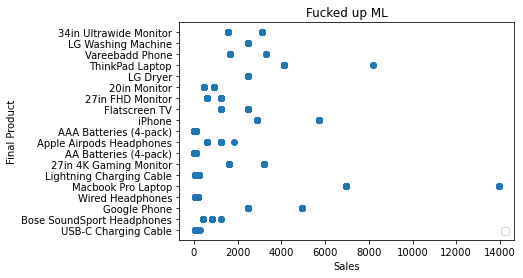

In [104]:
import matplotlib.pyplot as plt

plot = "Sales"
plt.scatter(all_data[plot], all_data["Product"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Product")
plt.title("Fucked up ML")
plt.show()